In [1]:
# Set global style
from IPython.core.display import display, HTML
style = """
<style>
  .container { 
    width:100% !important;
    margin: 0px;
    padding: 0px;
  }
  div#notebook {
    font-size: 14px;
    line-height: 20px;
    overflow-y: hidden;
    overflow-x: auto;
    width: 100%;
    outline: none;
    /*box-sizing: border-box;
    -moz-box-sizing: border-box;
    -webkit-box-sizing: border-box; */
    min-height: 100%;
    padding: 0px;
    margin: 0px;
  }
  .prompt_container {
    width: auto;
    padding-left: 0px;
    margin-left: 0px;
    display: none;
    border: none;
  }
  .prompt {
    width: 0px;
    border: solid;
    display: none;
  }
  .input_prompt {
    width: 0px;
    display: none;
  }
  .run_this_cell {
    margin: 0px;
    padding: 0px;
    display: visible;
  }
  .output_wrapper {
    display: none;
  }
  .cell, #notebook, #notebook_container {
    margin: 0px;
    padding: 0px;
  }
</style>"""
display(HTML(style))

<h2>ipywidgets</h2>
<p>Widgets are the basic elements of graphical user interfaces. Widgets are elements like sliders, text fields, buttons or 3D elements. ipywidgets is a python module that provides a set of basic GUI elements.</p>
<a href='https://ipywidgets.readthedocs.io/en/latest/'>ipywidgets documentation</a>

In [57]:
from ipywidgets import *

# A slider
slider = IntSlider()

# A text field
textarea = Textarea()

# A Button
button = Button(description='Click Me!', icon='check')

# A Tab widget
tab = Tab()

# Put them together in a list
widgetlist = [slider, textarea, button]

# A VBox widget to align them
tab.children = widgetlist

tab.set_title(0, 'IntSlider')
tab.set_title(1, 'TextArea')
tab.set_title(2, 'Button')

tab

VGFiKGNoaWxkcmVuPShJbnRTbGlkZXIodmFsdWU9MCksIFRleHRhcmVhKHZhbHVlPXUnJyksIEJ1dHRvbihkZXNjcmlwdGlvbj11J0NsaWNrIE1lIScsIGljb249dSdjaGVjaycsIHN0eWxlPULigKY=


<h3>Linking widgets with jslinks</h3>
<p>To make widgets actually do something they need to be linked in one way or the other. One posibility to do this is to link them with the ipywidgets.jslink() function.</p>

In [61]:
slider2 = IntSlider(description='IntSlider:', value=30)
progbar = IntProgress(description='Progressbar:', value=50)

display(slider2, progbar)

IntSlider(value=30, description=u'IntSlider:')

IntProgress(value=50, description=u'Progressbar:')

In [62]:
l = widgets.jslink((slider2, 'value'), (progbar, 'value'))

<h3>Connecting widgets with ipywidgets.interactive()</h3>
<p>Another way is to connect them with the ipywidgets.interactive() function, wich is called every time the value of the first widget is changing</p>

In [63]:
# Import numpy and create 100 random values
import numpy as np
randlist = np.random.randn(100)

# Creating a SelectBox
selectbox = widgets.SelectMultiple(options=randlist, rows=15)

# Defining the function to be called when a value changes
def f(val):
    selectbox.options = sorted([i for i in randlist if val[0] <= i <= val[1]])

# Connecting the widgets with the ipywidgets.interactive function
w = widgets.interactive(f, val=widgets.FloatRangeSlider(description='Value Range:', value=(0, 1), min=0, max=1, step=0.01))


# Display everything
display(selectbox, w)

U2VsZWN0TXVsdGlwbGUob3B0aW9ucz0oLTAuNDAzODQ3NjgyMzM5NzE1NjMsIC0wLjA1OTIwMDY2MzcwODQxMzI5NCwgLTAuMzE3ODA5MDAzMTg4MjY4OTMsIC0wLjg3OTMyODM4MzkxMjI3OTbigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0UmFuZ2VTbGlkZXIodmFsdWU9KDAuMCwgMS4wKSwgZGVzY3JpcHRpb249dSdWYWx1ZSBSYW5nZTonLCBtYXg9MS4wLCBzdGVwPTAuMDEpLCBPdXTigKY=


<h3>Using Boxes to align GUI elements</h3>
<p>ipywidgets provides the widgets Box, VBox and HBox to group single widgets vertical or horizontal</p>

In [45]:
from ipywidgets import *

Tab([Label(str(i)) for i in range(4)])

strvalue = Text(
    value='Neue Aufgabe',
    placeholder='Neue Aufgabe',
    description='Description:',
    disabled=False
)

intvalue = IntSlider(
    value=30,
    min=0,
    max=100,
    step=1,
    description='Integer Value:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    slider_color='white'
)

floatvalue = FloatText(
    value=3.1415,
    description='Float Value:',
    disabled=False,
    color='black'
)

boolvalue = Checkbox(
    value=False,
    description='Valid:',
    disabled=False
)

multivalue = Dropdown(
    options={'Low', 'Medium', 'High'},
    value='Medium',
    description='Priority:'
)

tagsvalue = SelectMultiple(
    options=['Reading', 'Meeting', 'Coding'],
    value=[],
    description='Tags:',
    disabled=False
)

textvalue = Textarea(
    value='',
    placeholder='Comment...',
    description='Comment:',
    disabled=False
)

datevalue = DatePicker(
    description='ToDo until:'
)

colorvalue = ColorPicker(
    concise=False,
    description='Tag with color:',
    value='orange'
)
description_style = """<style>.dark_background { background-color:black !important; color:#FFFFFF !important;}
.boxheader { font-size:'30px' !important; text-align:'center' !important;}</style>"""
form = [strvalue, datevalue, intvalue, floatvalue, boolvalue, colorvalue, textvalue]
result = [Label(value='Form').add_class('heading')] + [Label() for field in form]
labels = [Label(value=field.description, layout=Layout(width='100px')).add_class('dark_background') for field in form]
for field in zip(form, result):
    l = jslink((field[0], 'value'), (field[1], 'value'))


boxlayout = Layout(margin='30px', border='solid', min_width='400px', min_height='400px')
headinglayout = Layout(font_size='30px', align='center')

fbox = VBox([Label(value='Input Form'), VBox(form, layout=boxlayout)], layout=Layout(align_items='center'))
rbox = VBox([Label(value='Result'), VBox([HBox(i) for i in zip(labels, result)], layout=boxlayout)], layout=Layout(align_items='center'))
HBox([HTML(description_style), fbox, rbox])

SEJveChjaGlsZHJlbj0oSFRNTCh2YWx1ZT11IjxzdHlsZT4uZGFya19iYWNrZ3JvdW5kIHsgYmFja2dyb3VuZC1jb2xvcjpibGFjayAhaW1wb3J0YW50OyBjb2xvcjojRkZGRkZGICFpbXBvcnTigKY=


<h2>qgrid to make panda.DataFrame's interactive</h2>
<p>To replace the usual visualisation of pandas.Dataframe's by an interactive one qgrid provides a widgets that uses the javascript library slickgrid</p>


In [46]:
import pandas as pd
import qgrid

# df = pd.read_csv('plz_einwohner.csv')
df = pd.read_csv('/home/chy/.local/lib/python3.6/site-packages/statsmodels/datasets/grunfeld/grunfeld.csv')
grid = qgrid.show_grid(show_toolbar=True, data_frame=df)
grid

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


<h2>bqplot als Schnittstelle von Python und Javascript</h2>

In [65]:
from bqplot import *

# Wir erzeugen uns ein paar Zufallsdaten
data = np.random.rand(10)

# Wir machen uns ein Pie Chart...
pie = Pie(sizes=data,
          display_labels='outside',
          labels=list(string.ascii_uppercase))

# ... fuegen es in eine Figur ein...
fig = Figure(marks=[pie],
#              animation_duration=1000,
             layout={'width':'100%'})

# ... und zeigen sie an.
display(fig)

RmlndXJlKGZpZ19tYXJnaW49eyd0b3AnOiA2MCwgJ3JpZ2h0JzogNjAsICdib3R0b20nOiA2MCwgJ2xlZnQnOiA2MH0sIGxheW91dD1MYXlvdXQod2lkdGg9dScxMDAlJyksIG1hcmtzPVtQaWXigKY=


<p>The created pie chart has a 'sort' attribut. Executing pie.sort returns the value of the actual state of the pie.chart (equivalent to a getter function)</p>

In [31]:
pie.sort

False

<p>Beside the possibility to get the actual value of the sort property it is also possible to set a value by assining a value to it (as with a setter function).</p> 

In [66]:
pie.sort = True

<p>By combining the get request of the property with setting the property it is easy to toggle the value.</p>

In [38]:
if pie.sort:
    pie.sort = False
else:
    pie.sort = True

In [67]:
# Wir erzeugen zwei leere dictionaries
controls, jlinks = dict(), dict()

# Wir basten uns eine Checkbox mit der Beschreibung "Sort"
controls['sort'] = Checkbox(description='Sort', value=pie.sort)

# Wir verlinken den Wert dieser Checkbox mit dem tatsaechlichem Wert des Pie Charts 
# !!!Dies ist der wichtige Punkt der die eigentliche Interaktivitaet bereitstellt
jlinks['sort'] = jslink((controls['sort'], 'value'), (pie, 'sort'))

# Wir gruppieren alles in einer HBox und zeigen diese an
display(HBox([fig, VBox(list(controls.values()))]))

SEJveChjaGlsZHJlbj0oRmlndXJlKGZpZ19tYXJnaW49eyd0b3AnOiA2MCwgJ3JpZ2h0JzogNjAsICdib3R0b20nOiA2MCwgJ2xlZnQnOiA2MH0sIGxheW91dD1MYXlvdXQod2lkdGg9dScxMDDigKY=


In [68]:
# Wir basteln eine weitere Checkbox um zusaetlich Zahlen im Diagramm anzuzeigen
controls['display_values'] = Checkbox(description='Display Values', value=pie.display_values)
jlinks['display_values'] = jslink((controls['display_values'], 'value'), (pie, 'display_values'))

# ... und eine um es unsichtbar zu machen - klingt bei nur einem Chart sinnlos
#  aber bei mehreren die man einzeln anzeigen moechte macht es Sinn
controls['visible'] = Checkbox(description='Visible', value=pie.visible)
jlinks['visible'] = jslink((controls['visible'], 'value'), (pie, 'visible'))

# Und eine Textbox fuer den Titel
controls['title'] = Text(description='Title', value='Pie Chart', )
jlinks['title'] = jslink((controls['title'], 'value'), (fig, 'title'))

# Und eine um das Zahlenformat zu aendern
controls['values_format'] = Text(description='Value Format', value=pie.values_format)
jlinks['values_format'] = jslink((controls['values_format'], 'value'), (pie, 'values_format'))

# Und zwei Controls um das Chart zu verschieben
controls['x'] = FloatText(description='X', value=pie.x, step=0.01)
jlinks['x'] = jslink((controls['x'], 'value'), (pie, 'x'))
controls['y'] = FloatText(description='Y', value=pie.y, step=0.01)
jlinks['y'] = jslink((controls['y'], 'value'), (pie, 'y'))

# Und nochmal zwei um Start- und Endwinkel einzustellen
controls['start_angle'] = IntText(description='Start Angle', value=pie.start_angle)
jlinks['start_angle'] = jslink((controls['start_angle'], 'value'), (pie, 'start_angle'))
controls['end_angle'] = IntText(description='End Angle', value=pie.end_angle)
jlinks['end_angle'] = jslink((controls['end_angle'], 'value'), (pie, 'end_angle'))

# Und zur Abwechslung zwei Slider fuer den inneren und aeusseren Radius
controls['inner_radius'] = IntSlider(description='Inner Radius', max=pie.radius, value=pie.inner_radius)
jlinks['inner_radius'] = jslink((controls['inner_radius'], 'value'), (pie, 'inner_radius'))
controls['radius'] = IntSlider(description='Radius', max=400, min=pie.inner_radius, value=pie.radius)
jlinks['radius'] = jslink((controls['radius'], 'value'), (pie, 'radius'))

# Und noch einen ColorSelector um die die Farbe der Beschriftung zu aendern
controls['label_color'] = ColorPicker(description='Label Color', value='black')
jlinks['label_color'] = jslink((controls['label_color'], 'value'), (pie, 'label_color'))

# Und zeigen alles an
display(HBox([fig, VBox(list(controls.values()))]))

SEJveChjaGlsZHJlbj0oRmlndXJlKGZpZ19tYXJnaW49eyd0b3AnOiA2MCwgJ3JpZ2h0JzogNjAsICdib3R0b20nOiA2MCwgJ2xlZnQnOiA2MH0sIGxheW91dD1MYXlvdXQod2lkdGg9dScxMDDigKY=


In [69]:
from bqplot import pyplot, Tooltip

fig1 = pyplot.figure()
hist1 = pyplot.hist(df[df.columns[1]])
hist1.tooltip = Tooltip(fields=['index', 'count', 'midpoint'], formats=['', '', '.0f'])
hist1.interactions = {'hover':'tooltip', 'click':'select'}
legend = pyplot.legend()
fig1

RmlndXJlKGF4ZXM9W0F4aXMob3JpZW50YXRpb249J3ZlcnRpY2FsJywgc2NhbGU9TGluZWFyU2NhbGUoKSksIEF4aXMoc2NhbGU9TGluZWFyU2NhbGUoKSldLCBmaWdfbWFyZ2luPXsndG9wJzrigKY=


In [70]:
# ax.grid_color = 'black'
# ax.color = 'green'
# ax.grid_lines = 'dashed' # ['none', 'solid', 'dashed']
# ax.label = 'Count'
# ax.label_color = 'black'
# ax.label_location = 'end' # ['start', 'end', 'middle']
# ax.label_offset = '30px'
# ax.num_ticks = 10

In [71]:
def width(i):
    fig1.layout.width = str(i) + '%'

def height(i):
    fig1.layout.height = str(i) + 'px'

def title(s):
    fig1.title = s

def bincolor(c):
    hist1.colors = [c]
    
def opacities(f):
    hist1.opacities = [f] * hist1.bins
    
def strokecolor(c):
    hist1.stroke = c

def nbins(i):
    hist1.bins = i

def show_legend(b):
    hist1.show_legend = b
    
def labels(s):
    hist1.labels = [s]

def setdata(col):
    hist1.sample = df[col]

def normalized(b):
    hist1.normalized = b
    
def legend_location(pos):
    fig1.legend_location = pos

HBox([fig1, VBox([interactive(width, i=IntSlider(min=0, max=100, value=100, description='Width:')),
        interactive(height, i=IntSlider(min=0, max=500, value=500, description='Height:')),
        interactive(nbins, i=IntSlider(min=0, max=100, value=20, description='Bins:')),
        interactive(title, s=Text(description='Title:', value='')),
        interactive(bincolor, c=ColorPicker(description='BG Color:', value='blue')),
        interactive(strokecolor, c=ColorPicker(description='Stroke Color:', value='black')),
        interactive(show_legend, b=RadioButtons(description='Legend:', options=[True, False], value=True)),
        interactive(legend_location, pos=Dropdown(description='Legend Loc.:', options=['top', 'bottom', 'left', 'right', 'top-left', 'top-right', 'bottom-left', 'bottom-right'], value='top')),
        interactive(opacities, f=FloatSlider(description='Opacity:', min=0, max=1, step=0.01, value=1)),
        interactive(labels, s=Text(description='Label:', value='')),
        interactive(normalized, b=RadioButtons(description='Normalize:', options=[True, False], value=False)),
        interactive(setdata, col=Dropdown(description='Data:', options=[col for col in df.columns if df[col].dtype in {np.dtype('int'), np.dtype('float')}], value=df.columns[0]))
        ], layout={'width':'430px'})], layout={'display':'flex'})

SEJveChjaGlsZHJlbj0oRmlndXJlKGF4ZXM9W0F4aXMob3JpZW50YXRpb249J3ZlcnRpY2FsJywgc2NhbGU9TGluZWFyU2NhbGUoKSwgc2lkZT0nbGVmdCcpLCBBeGlzKHNjYWxlPUxpbmVhclPigKY=


<h3>Making matplotlib interactive with matplotlib notebook</h3>
<p>Plots made with matplotlib can be made interactive by using<br><b>%matplotlib notebook</b><br>instead of<br><b>%matplolib inline</b></p>

<IPython.core.display.Javascript object>


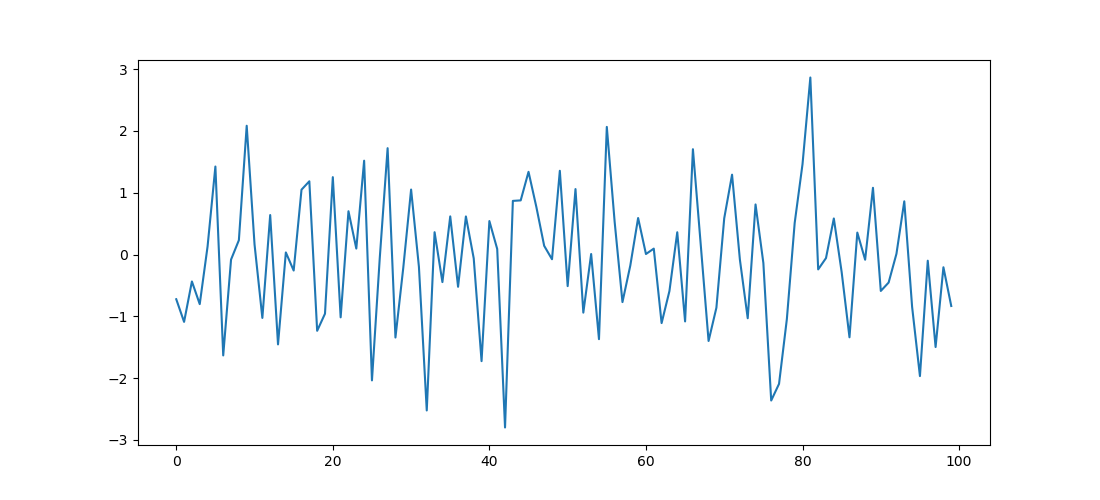

In [76]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

plt.figure(figsize=(11, 5))
plt.plot(np.random.randn(100))
plt.show()

<IPython.core.display.Javascript object>


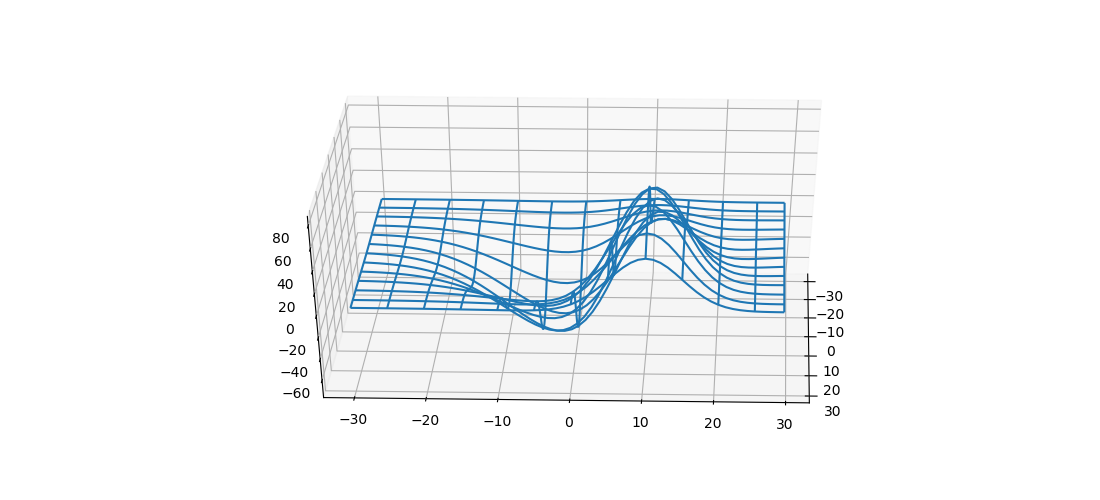

In [78]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

<h2>Interactive Maps with folium</h2>
<p>folium is a python module leveraging leaflet maps in jupyter notebooks</p>
<ul>
    <li><a href="https://python-visualization.github.io/folium/">Folium Documentation</a></li>
    <li><a href="https://leafletjs.com/">Leaflet Documentation</a></li>
</ul>

In [79]:
import os
import folium
from folium import features
from folium.plugins import MarkerCluster

position = (11.4183792, 48.1527277)

def readlines(p):
    with open(p) as f:
        return [(line.strip().split('|')) for line in f.readlines()]

mapp = folium.Map([position[1], position[0]], zoom_start=4)

mc = MarkerCluster()
markerpos = readlines('/home/chy/web/test/geopositions2.csv')
    
mks = [features.Marker([float(i[1]), float(i[2])]) for i in markerpos]

for n in range(len(mks)):
    mc.add_child(mks[n])

mapp.add_child(mc)

mapp.save(os.path.join('mymap.html'))
mapp

/home/chy/.local/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


<h3>3D Objects with pythreejs</h3>

In [80]:
from pythreejs import *
from IPython.display import display
from math import pi

In [81]:
# Reduce repo churn for examples with embedded state:
from pythreejs._example_helper import use_example_model_ids
use_example_model_ids()

In [82]:
earth = ImageTexture(imageUri='img/earth.jpg')

In [83]:
earth

UHJldmlldyhjaGlsZD1JbWFnZVRleHR1cmUoaW1hZ2VVcmk9dSdpbWcvZWFydGguanBnJywgcmVwZWF0PSgxLjAsIDEuMCksIHZlcnNpb249MSksIHNoYWRvd01hcD1XZWJHTFNoYWRvd01hcCjigKY=


<h3>Molecules with nglview</h3>

In [93]:
from ipywidgets import *
import nglview as nv

view = nv.show_structure_file(nv.datafiles.PDB)
view._remote_call("setSize", target="Widget", args=["100%", "600px"])

def licorice(b):
    view.clear_representations()
    view.add_licorice('not hydrogen')

def backbone(b):
    view.clear_representations()
    view.add_backbone()
    view.color_by('atomindex')

def cartoon(b):
    view.clear_representations()
    view.add_cartoon()
    
def spacefill(b):
    view.clear_representations()
    view.add_spacefill('not hydrogen')

def ballandstick(b):
    view.clear_representations()
    view.add_ball_and_stick()

def helixorient(b):
    view.clear_representations()
    view.add_helixorient()
    
reps = ['licorice', 'backbone', 'cartoon', 'spacefill', 'ballandstick', 'helixorient']

btns = [Button(description=rep, on_click=rep) for rep in reps]

btns[0].on_click(licorice)
btns[1].on_click(backbone)
btns[2].on_click(cartoon)
btns[3].on_click(spacefill)
btns[4].on_click(ballandstick)
btns[5].on_click(helixorient)

VBox([view, HBox(btns)])

VkJveChjaGlsZHJlbj0oTkdMV2lkZ2V0KCksIEhCb3goY2hpbGRyZW49KEJ1dHRvbihkZXNjcmlwdGlvbj11J2xpY29yaWNlJywgc3R5bGU9QnV0dG9uU3R5bGUoKSksIEJ1dHRvbihkZXNjcmnigKY=
